In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
#import fractions

TOLERANCE = 1e-08
#np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## (a) Implement PageRankDense(G, alpha)

Implements basic PageRank algorithm by forming the Google Matrix directly.
<!--"""G = np.matrix([[0,0,1,0,0,1],
               [0,0,1,0,0,0],
               [0,0,0,0,0,1],
               [0,1,1,0,1,1],
               [0,1,0,0,0,1],
               [0,0,1,0,1,0]])"""
"""G = np.matrix([[0,0,1,0,0,0],
               [1,0,1,0,0,0],
               [1,0,0,0,0,0],
               [0,0,0,0,1,1],
               [0,0,1,1,0,0],
               [0,0,0,1,1,0]])
print(PageRankDense(G))"""
"""G = np.matrix([[0,1,0,0],
               [0,1,0,1],
               [0,1,0,0],
               [0,0,0,1]])""" # works
"""G = np.matrix([[0,0,1,0,0,1],
               [0,0,1,0,0,0],
               [0,0,0,0,0,1],
               [0,1,1,0,1,1],
               [0,1,0,0,0,1],
               [0,0,1,0,1,0]])""" # works
-->

In [5]:
def PageRankDense(G: np.matrix, alpha: float = 0.85) -> tuple:
    """
    Determines the pagerank for a network using the standard PageRank algorithm.
    * G: adjacency matrix, 2D numPy array
    * alpha: scalar weight

    Returns tuple [p, it]:
    * p: vector of pagerank scores
    * it: int representing steps taken
    """
    g_len = len(G)

    # Obtain the sums of the columns.
    column_sums = np.array([np.sum(c) for c in G.T])
    P_og = np.divide(G, column_sums, where=column_sums != 0)
    
    # Obtain d, Er
    d = np.array([1 - np.sum(c) for c in P_og.T]) # This works because everything in P_og now sums to 0/1.
    eR = np.ones(g_len) / g_len
    P_prime = np.add(P_og, np.multiply(eR, d))
    escape = np.ones(shape=G.shape) / len(G)

    m = alpha * P_prime + (1 - alpha) * escape
    it = 0
    p = eR.T.reshape(-1,1)
    #p = np.matrix([[0.25,0.25,0,0.25,0,0.25]]).T

    while True:
        it += 1
        p_new = np.matmul(m, p)
        #return p_new, it
        if np.max(np.abs(np.subtract(p_new,p))) < TOLERANCE:
            return p_new, it
        p = p_new

## (b) Construct adjacency matrix G

Constructs G and runs PageRankDense with it.

In [6]:
G = np.matrix([
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,1,0,1,0,0,0,0,0],
    [0,0,1,0,0,0,0,1,0,1,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,1,0,1,0,1,0],
    [0,0,0,0,0,0,0,1,1,1,0,0,0,1],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0]
])

p, it = PageRankDense(G, 0.9)
print(p, it) # print the vector

[[0.03885066]
 [0.03993066]
 [0.07381624]
 [0.06248823]
 [0.03288854]
 [0.04002228]
 [0.063496  ]
 [0.09892555]
 [0.10291725]
 [0.06380141]
 [0.02088186]
 [0.2137178 ]
 [0.11537497]
 [0.03288854]] 22


Indices of the web pages according to PageRank, most to least important:

In [7]:
correct_order = np.argsort(p.T[0])
sites = [c for c in correct_order.tolist()[0]][::-1]
for i in range(len(sites)):
    print(f"Web Page #{i+1}.", sites[i]+1)

Web Page #1. 12
Web Page #2. 13
Web Page #3. 9
Web Page #4. 8
Web Page #5. 3
Web Page #6. 10
Web Page #7. 7
Web Page #8. 4
Web Page #9. 6
Web Page #10. 2
Web Page #11. 1
Web Page #12. 14
Web Page #13. 5
Web Page #14. 11


Sparsity pattern plot and pagerank score bar graph:

[0.03885065562404048, 0.03993066282801793, 0.07381624181441372, 0.062488232407229234, 0.03288854272837991, 0.04002228138757622, 0.06349600476968578, 0.09892554566300045, 0.10291725365437578, 0.06380140922637019, 0.020881858431836386, 0.21371780306657082, 0.11537496567012148, 0.03288854272837991]


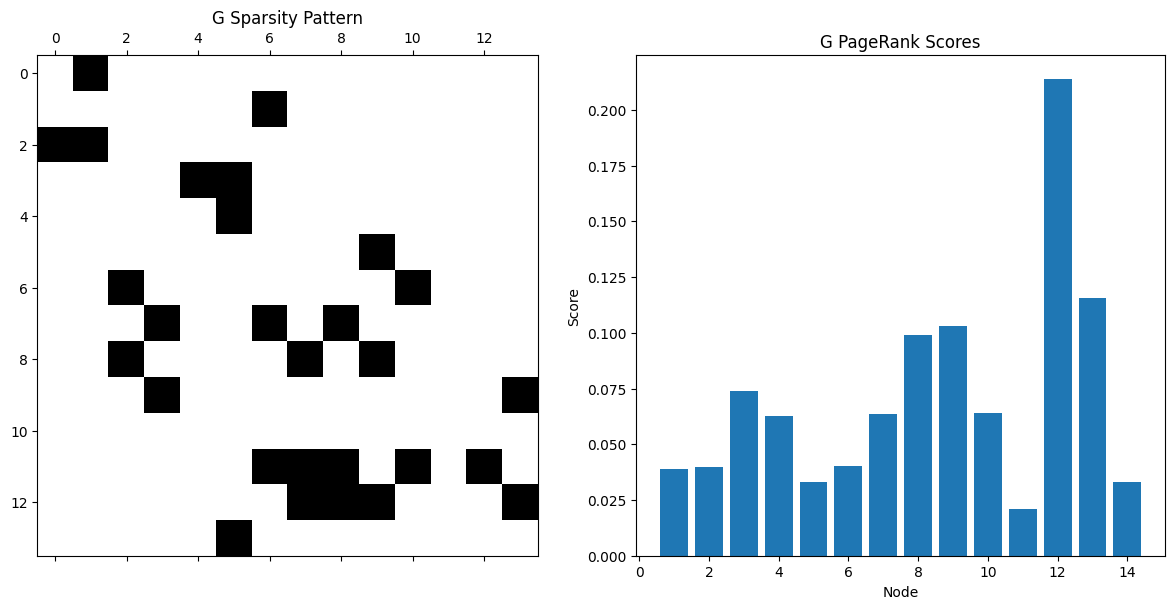

In [8]:
plt.figure(figsize=(12, 6)) # put em together
plt.subplot(1, 2, 1)

plt.spy(G)
plt.title("G Sparsity Pattern") 

p_graph = p.flatten().tolist()[0]
print(p_graph)

plt.subplot(1, 2, 2)
plt.bar(range(1,len(p_graph)+1), p_graph)
plt.title("G PageRank Scores")
plt.xlabel("Node")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

## (c) Implement PageRankSparse

In [9]:
from scipy.sparse import csr_matrix

def PageRankSparse(Gcsr, alpha: float = 0.85) -> tuple:
    """
    Efficiently computes the pagerank for a network using the standard PageRank algorithm without explicitly forming
    the Google Matrix M.

    * G: adjacency matrix, 2D numPy array
    * alpha: scalar weight

    Returns tuple [p, it]:
    * p: vector of pagerank scores
    * it: int representing steps taken
    """
    #print(Gcsr)
    # Mp^n = alpha * P * p^n + alpha / R * ed^T * p^n + (1-alpha)/R * ee^T * p^n
    r = Gcsr.shape[0] # Get length.
    
    column_sums = np.array([np.sum(c) for c in Gcsr.T])
    #print(column_sums)
    P_og = Gcsr / column_sums[np.newaxis, :] # still a sparse matrix
    #print(P_og)

    d = np.array([int(np.sum(c) == 0) for c in Gcsr.T]).reshape((r,1))
    e = np.ones(shape=(r,1))
    #print("e", e.T)
    #print("d", d.T)
    #print(r)
    p = np.divide(e, r)   
    #print(p)

    it = 0
    while True:
        it += 1

        one = alpha * P_og.dot(p)
        two = alpha / r * d.T.dot(p) 
        two = two[0,0] * e
        three = (1 - alpha) / r * e
        p_new = np.add(one, two)
        p_new = np.add(p_new, three)
        #return p_new, it
        if np.max(np.abs(np.subtract(p_new,p))) < TOLERANCE:
            return p_new, it
        p = p_new
        

"""adjacency_matrix = np.matrix([
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,1,0,1,0,0,0,0,0],
    [0,0,1,0,0,0,0,1,0,1,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,1,0,1,0,1,0],
    [0,0,0,0,0,0,0,1,1,1,0,0,0,1],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0]
])"""

Gcsr = csr_matrix(G)
#print(Gcsr)
pd, itd = PageRankSparse(Gcsr, 0.9)
assert(np.max(np.abs((pd - p)) < TOLERANCE)) 
# The error between PageRankDense and PageRankSparse is below TOLERANCE, which is basically eqiuvalent to 0.

## (d) Load sparse matrix from bbc.mat

Additionally plots and displays a list of the 20 most important urls.

In [10]:
import scipy.io
data = scipy.io.loadmat('bbc.mat')
Gcsr = data['G']
Gcsr = Gcsr.transpose() #data uses the reverse adjacency matrix convention.
U = data['U']

In [11]:
p, it = PageRankSparse(Gcsr, 0.9)
correct_order = (np.argsort(p.T[0]))[-20:][::-1]
#print(correct_order)
sites = [u[0] for u in U[correct_order].flatten()] # ...really numPy?
for i in range(len(sites)):
    print(f"{i+1}.", sites[i])


1. http://www.bbc.com
2. https://www.bbc.com/news
3. https://www.bbc.co.uk/news
4. http://www.bbcamerica.com
5. http://www.bbc.com/future/story/20181024-the-best-age-to-learn-a-foreign-language
6. http://www.bbc.com/future/story/20181026-how-one-sided-objects-like-a-mobius-strip-work
7. https://www.bbcgoodfood.com
8. https://www.bbc.com/news/business-45939984
9. https://www.bbc.com/news/education-45979234
10. https://www.bbc.com/news/uk-politics-45948282
11. https://www.bbc.com/news/business-45961761
12. http://www.bbc.com/travel/columns/travel-journeys
13. http://bbc.in/2s4bidh
14. http://www.bbc.com/travel
15. http://www.bbc.com/travel/columns/to-the-ends-of-the-earth
16. http://www.bbc.com/travel/columns/welcome-to-our-house
17. http://www.bbc.com/travel/columns/culinary-roots
18. http://bbc.in/2rAX81O
19. https://www.bbc.com/news/world-latin-america-45944164
20. https://www.bbc.com/news/world-europe-45902014


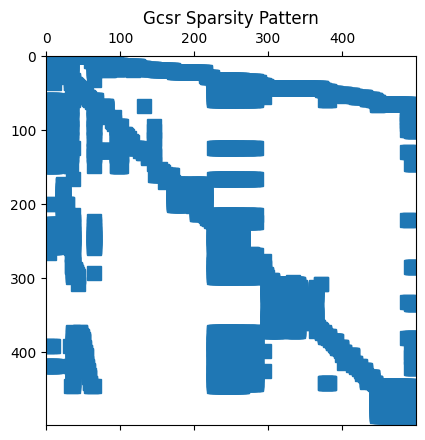

In [12]:
plt.spy(Gcsr)
plt.title("Gcsr Sparsity Pattern")
plt.show()

In [13]:
one = 1/2 * np.matrix(
    [[0,0,0,0,1,1/3],
     [1/2,0,1/2,1/2,0,0],
     [1/2,1/3,0,0,0,0],
     [0,1/3,0,0,0,1/3],
     [0,1/3,1/2,1/2,0,1/3],
     [0,0,0,0,0,0]]
)
#print(one)
two = 1/12 * np.ones((6,6))
#print(two)
#print(one + two)

#print(np.dot(one + two, np.matrix([[0.25,0.25,0,0.25,0,0.25]]).T))

one = np.matrix([[1,0,0],[-0.5,1,0],[0.5,-5/9,1]])
two = np.matrix([[30],[15],[-3]])
three = np.matmul(one.I, two)
u = np.matrix([[4,-4,23],
               [0,-9,39/2],
               [0,0,-2/3]])
x = np.matmul(u.I,three)
a = np.matrix([[2,3,0],
               [-2,-7,8],
               [4,-4,23]])
print(np.matmul(a,x))

"""blah = np.matrix(
    [[0,0,0,0,1,1],
     [1,0,1,1,0,0],
     [1,1,0,0,0,0],
     [0,1,0,0,0,1],
     [0,1,1,1,0,1],
     [0,0,0,0,0,0]]
    )
print(PageRankDense(blah, alpha=0.5))"""

[[-3.]
 [15.]
 [30.]]


'blah = np.matrix(\n    [[0,0,0,0,1,1],\n     [1,0,1,1,0,0],\n     [1,1,0,0,0,0],\n     [0,1,0,0,0,1],\n     [0,1,1,1,0,1],\n     [0,0,0,0,0,0]]\n    )\nprint(PageRankDense(blah, alpha=0.5))'